In [ ]:
!wget https://nlp100.github.io/data/neko.txt

--2022-11-30 08:08:54--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.1’

neko.txt.1          100%[===================>] 952.92K  --.-KB/s    in 0.05s   

2022-11-30 08:08:55 (19.6 MB/s) - ‘neko.txt.1’ saved [975789/975789]



In [10]:
!apt install mecab libmecab-dev mecab-ipadic-utf8 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 5 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubu

In [11]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [12]:
with open("./neko.txt.mecab","r") as f:
  for line in f.readlines()[:20]:
    print(line)


一	名詞,数,*,*,*,*,一,イチ,イチ



	記号,一般,*,*,*,*,*

EOS



	記号,一般,*,*,*,*,*

EOS

　	記号,空白,*,*,*,*,　,　,　

吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ

は	助詞,係助詞,*,*,*,*,は,ハ,ワ

猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ

で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ

ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル

。	記号,句点,*,*,*,*,。,。,。



	記号,一般,*,*,*,*,*

EOS

名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ

は	助詞,係助詞,*,*,*,*,は,ハ,ワ

まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ



In [14]:
with open("./neko.txt.mecab","r") as f:
  text_dict=[]
  sentence_dict=[]
  for line in f.readlines():
    if line=="\n":
     continue
    elif line !="EOS\n":
     node=line.split("\t")
     feature=node[1].split(",")

     if node[0]=="":
      continue

     word_dict={
         "surface":node[0],
         "base":feature[6],
         "pos":feature[0],
         "pos1":feature[1]
     }
     sentence_dict.append(word_dict)
    elif len(sentence_dict)!=0:
      text_dict.append(sentence_dict)
      sentence_dict=[]
print(len(text_dict))
for i in text_dict[:5]:
  for j in i:
    print(j)     
  print(" ")


9210
{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}
 
{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}
 
{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}
{'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}
 
{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '生れ', 'base': '生れる', 'pos

In [ ]:
pos_dict=[]
for i in text_dict:
  for j in i:
    if j['pos']=="動詞":
     pos_dict.append(j)  
for k in pos_dict[:5]:
  print(k['surface'])

生れ
つか
し
泣い
し


In [ ]:
pos_dict=[]
for i in text_dict:
  for j in i:
    if j['pos']=="動詞":
     pos_dict.append(j)  
for k in pos_dict[:5]:
  print(k['base'])

生れる
つく
する
泣く
する


In [ ]:
A_of_B_dict=[]
for i in text_dict:
  for j in range(len(i)-2):
   if(i[j]['pos']=="名詞" and i[j+1]['surface'] == "の" and i[j+2]['pos'] == "名詞"):
     A_of_B_dict.append(i[j]['surface']+i[j+1]['surface']+i[j+2]['surface'])
for k in A_of_B_dict[:5]:
  print(k)
  

彼の掌
掌の上
書生の顔
はずの顔
顔の真中


In [44]:
noun_conj=[]
for sentence in text_dict:
  for i,word in enumerate(sentence):
    if(word["pos"]=="名詞")&((i==0)|(sentence[i-1]["pos"]!="名詞")):
      nouns=""
      j=0

      while(i+j<len(sentence)-1)&(sentence[i+j]["pos"]=="名詞"):
        nouns+=sentence[i+j]["surface"]
        j+=1
      if j>=2:
        noun_conj.append(nouns)
print(noun_conj)
res=max(noun_conj,key=len,default='none')
print(res)
noun_conj.index("manyaslip'twixtthecupandthelip")
noun_conj[973]

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱性', '物指', '尻ぺたをひどく', '言語同断', '家内総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日目', '四疋', '白君', '我等猫族', '家族的生活', '三毛君', '所有権', '我々同族間', '目刺', '一番先', '彼等人間', '我等', '吾人', '白君', '三毛君', '間違いだらけ', '後架先生', '宗盛', '宗盛', '月給日', '水彩絵具', '毎日毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '露華', '寒鴉', 'これ一幅', '活画', '翌日吾輩', '一分', '辛棒', '今吾輩', '今吾輩', '波斯産', '上不思議', '盲猫', '心中ひそか', 'いくらアンドレア・デル・サルト', '一分', 'あと大', '壊わし', '馬鹿野郎', '馬鹿野郎', '辛棒', '馬鹿野郎呼わり', '平生吾輩', '馬鹿野郎', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減', '穏かな日', '二時頃', '昼飯後', '運動かたがた', '一本一本', '杉垣', '前後不覚', '庭内', '忍び入り', '黒猫', '柔毛', '出ずるよう', '猫中', '杉垣', '二三枚', 'ぐべき力', '険呑', '時吾輩', '言葉付', '誰だい', '乱暴猫', '同盟敬遠主義', '一体車屋', '大分強そう', 'おれなんざ', '茶畠', '箆棒め', 'あらら', 'その後吾輩', '車屋相当', '不徳事件', '日例', '茶畠', '何匹', '近付', '事彼', '手柄話', '欠所', '三

"manyaslip'twixtthecupandthelip"

In [38]:
import itertools
from collections import Counter

flat=list(itertools.chain.from_iterable(text_dict))
flat=[f["base"] for f in flat if f["pos"]!="記号"]


words = Counter(flat)
word_freq=words.most_common()
print(word_freq)


[('の', 9194), ('て', 6848), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5972), ('と', 5508), ('が', 5337), ('た', 4267), ('する', 3657), ('ない', 3052), ('も', 2479), ('ある', 2320), ('*\n', 2191), ('で', 2084), ('から', 2031), ('いる', 1777), ('ん', 1568), ('か', 1529), ('云う', 1408), ('事', 1207), ('です', 1164), ('ます', 1146), ('なる', 1120), ('へ', 1034), ('う', 987), ('もの', 981), ('君', 973), ('主人', 932), ('ぬ', 719), ('よう', 696), ('見る', 675), ('ね', 657), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('思う', 502), ('よ', 502), ('吾輩', 481), ('来る', 460), ('れる', 450), ('じゃ', 450), ('これ', 414), ('さ', 410), ('それ', 381), ('聞く', 347), ('でも', 346), ('時', 345), ('行く', 340), ('出来る', 324), ('三', 319), ('出る', 317), ('な', 317), ('まで', 313), ('ところ', 313), ('方', 312), ('やる', 311), ('二', 303), ('上', 294), ('いい', 294), ('寒月', 286), ('顔', 282), ('先生', 274), ('人間', 272), ('くらい', 269), ('僕', 268), ('ごとし', 261), ('さん', 260), ('気', 250), ('猫', 248), ('だけ', 246), ('たい', 241), ('また

In [16]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 4.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=3fde44456578c3e0f8d53560b7dbae0f4134bfe40aef8622967ff34a3979945d
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


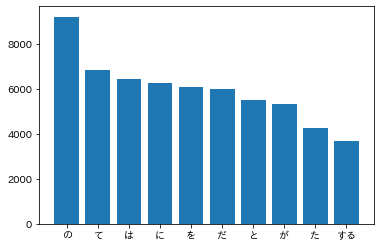

In [19]:
import matplotlib.pyplot as plt
import japanize_matplotlib

word_freq=dict(word_freq[:10])
plt.figure()
plt.bar(word_freq.keys(),word_freq.values())
plt.show()

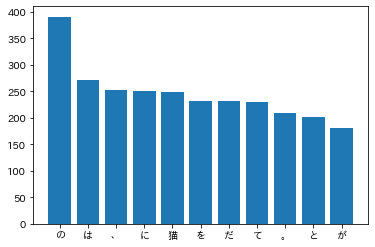

In [28]:
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

neko_cooc=Counter([])

for sentence in text_dict:
  words=[word["base"]for word in sentence]
  
  if "猫" in words:
    neko_cooc+=Counter(words)
  

neko_cooc=dict(neko_cooc.most_common()[:11])
neko_cooc.pop("猫")

plt.figure()
plt.bar(neko_cooc.keys(),neko_cooc.values())
plt.show()

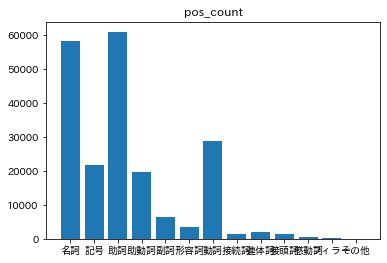

In [36]:
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

pos_count=Counter([])
for sentence in text_dict:
  words=[word["pos"]for word in sentence]
  pos_count+=Counter(words)

pos_count=dict(pos_count)


plt.title('pos_count')
plt.bar(pos_count.keys(),pos_count.values())
plt.show()



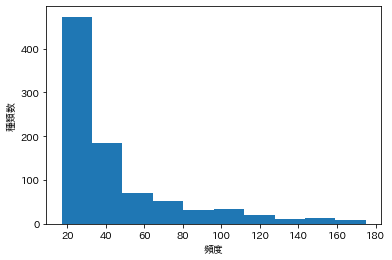

In [42]:
word_f=dict(word_freq[100:1000])

plt.figure()
plt.hist(word_f.values())
plt.xlabel("頻度")
plt.ylabel("種類数")
plt.show()

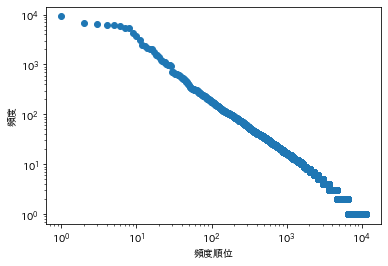

In [43]:
rank=range(1,len(word_freq)+1)

plt.figure()
plt.scatter(rank,dict(word_freq).values())
plt.xscale("log")
plt.yscale("log")
plt.xlabel("頻度順位")
plt.ylabel("頻度")
plt.show()